https://qiskit.org/learn

https://learning.quantum-computing.ibm.com/

# QFT

The QFT is a change of basis from computational basis to Fourier basis.

$$|\tilde{x}\rangle =QFT|x\rangle= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \exp{\left( \frac{2 \pi i \ xy}{N}\right)}|y\rangle \qquad x= 0, \cdots , N-1$$

Where for $n$ qubits, there are $N=2^n$ computational states. Defining:

$$\omega_{_N}=\exp \frac{2\pi i}{N}$$
The QFT can be written as:

$$|\tilde{x}\rangle =QFT|x\rangle= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_{_N}^{xy} |y\rangle \qquad x= 0, \cdots , N-1$$
In order to have a representation to help build the circuit, the previous expression can be expanded in:



$$ \begin{align}|\tilde{x}\rangle &=  \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_{_N}^{xy} |y\rangle=  \frac{1}{\sqrt{N}} \sum_{y_0=0}^1 \cdots \sum_{y_{n-1}=0}^{1} \omega_{_N}^{x \sum y_k 2^{k}} |y_0y_1\cdots y_{n-1}\rangle\\
&=\frac{1}{\sqrt{N}} \sum_{y_0=0}^1 \cdots \sum_{y_{n-1}=0}^{1} \bigotimes_{k=0}^{n-1} \omega_{_N}^{xy_k 2^k} |y_0y_1\cdots y_{n-1}\rangle = \frac{1}{\sqrt{N}} \bigotimes_{k=0}^{n-1} \sum_{y_k=0}^1 \omega_{_N}^{xy_k 2^k} | y_k \rangle\\
&=  \frac{1}{\sqrt{N}} \bigotimes_{k=0}^{n-1} \left( |0\rangle + \omega_{_N}^{x2^k} |1\rangle \right) =
 \frac{1}{\sqrt{N}} \bigotimes_{k=0}^{n-1} \left( |0\rangle + e^{2\pi i \ x 2^{k-n}} |1\rangle \right) 
\end{align}$$
Depending on $k$, the phase of $|1\rangle$ varies and encode more and more binary fractional digits. The power of 2 shifts them and the other ones are absorbed by the periodicity of the complex exponential. 

Relabeling the indices, and paying attention to the endianiness, the action of QFT is understood as:
$$|x\rangle=|x_1x_2\cdots x_n \rangle$$
$$|x_k\rangle \mapsto |0\rangle + \exp \left({2 \pi i \frac{x}{2^k}}\right)|1\rangle$$
$$|x_k\rangle \mapsto |0\rangle +\exp\left(2\pi i [0.x_k \cdots x_2x_1]\right) |1\rangle$$
where it was Introduced the binary fractional notation:
	$$[0.x_ax_{a+1}\cdots x_{b}]=\frac{x_a}{ 2^{1}}+\frac{x_{a+1}} {2^{2}}+ \cdots+\frac{x_{b}}{2^{b-a+1}}$$

Using this notation, the effect of the QFT can be finally understood as an encoding in the relative phase of each qubit, the fractional part of $x/2^k$. 

For example:

$$|3\rangle=|110\rangle \qquad \text{since} \qquad 3=1\cdot2^0+1\cdot2^1+0\cdot2^2$$

$$3_{b10}=011_{b2}  \xrightarrow{\cdot 2^{-1}} 01.1=[0.1]  \xrightarrow{\cdot 2^{-1}} 0.11=[0.11] \xrightarrow{\cdot 2^{-1}} 0.011=[0.011]$$

![QFT_circuit](QFT_circuit.png)

In [28]:
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
import numpy as np

In [29]:
#qiskit code

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

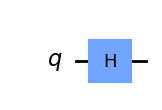

In [30]:
n=1
circuit=QuantumCircuit(n)
qft_rotations(circuit, n)

circuit.draw('mpl')

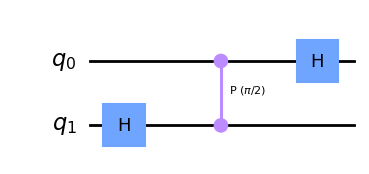

In [31]:
n=2
circuit=QuantumCircuit(n)
qft_rotations(circuit, n)

circuit.draw('mpl')

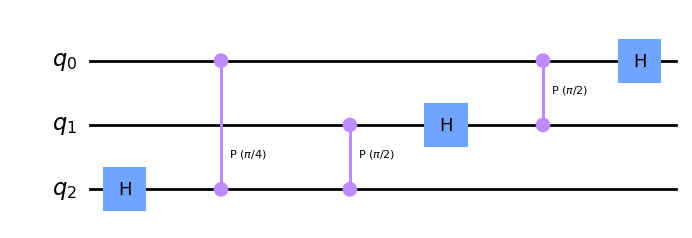

In [32]:
n=3
circuit=QuantumCircuit(n)
qft_rotations(circuit, n)

circuit.draw('mpl')

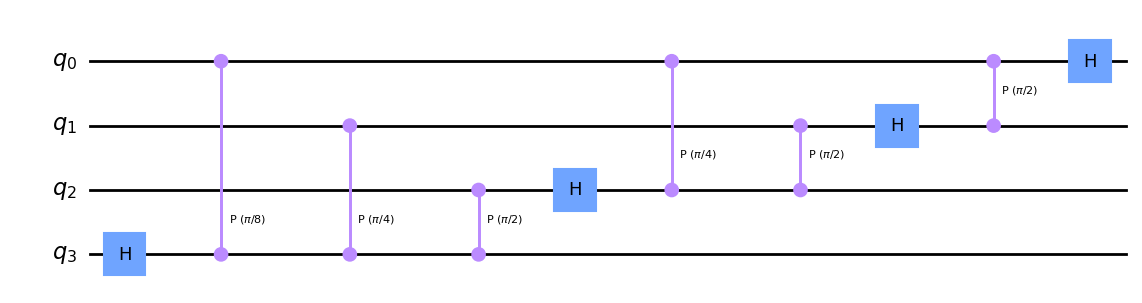

In [33]:
n=4
circuit=QuantumCircuit(n)
qft_rotations(circuit, n)

circuit.draw('mpl')

In [34]:
#qiskit code

def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit

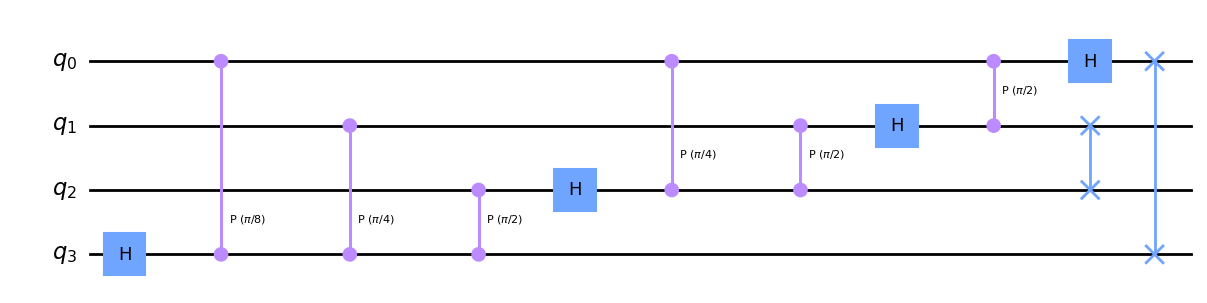

In [35]:
swap_registers(circuit, n)
circuit.draw('mpl')

Now let's visualize what happen for different x values.

In [36]:
from qiskit.circuit.library import QFT

backend = Aer.get_backend('statevector_simulator')

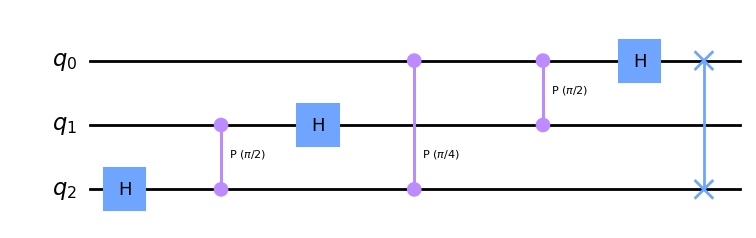

In [37]:
QFT(3).decompose().draw('mpl')

In [38]:
states = []
n=4
for x in range(2**n):
    bin_x = bin(x)[2:].zfill(n)
    print(bin_x)
    circ = QuantumCircuit(n)
    for i in range(n):
        if bin_x[i]=='1':
            circ.x(i)

    job = backend.run(circ)
    psi_in=job.result().get_statevector()

    circ.append(QFT(4),range(4))

    job = execute(circ,backend)
    ## Instead of execute, I can create a Qobj from the circuit for the simulator to run
    #test = transpile(circuit, backend)
    #qobj = assemble(test)
    #psi = backend.run(qobj).result().get_statevector()
    psi_out=job.result().get_statevector()

    states.append((psi_in,psi_out))



0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


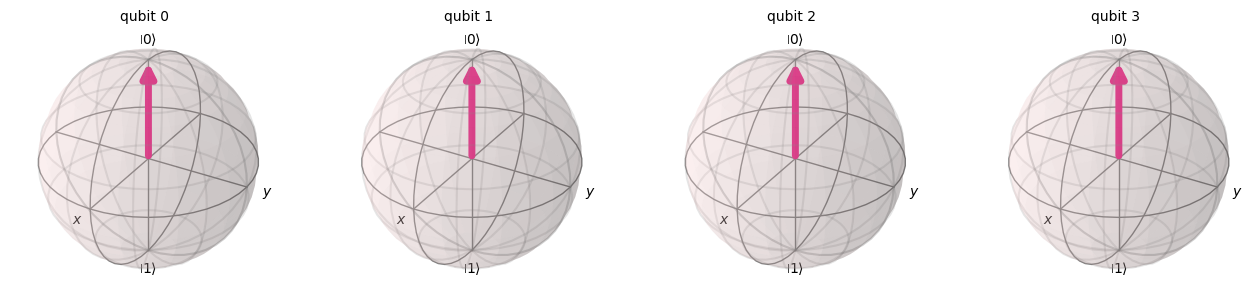

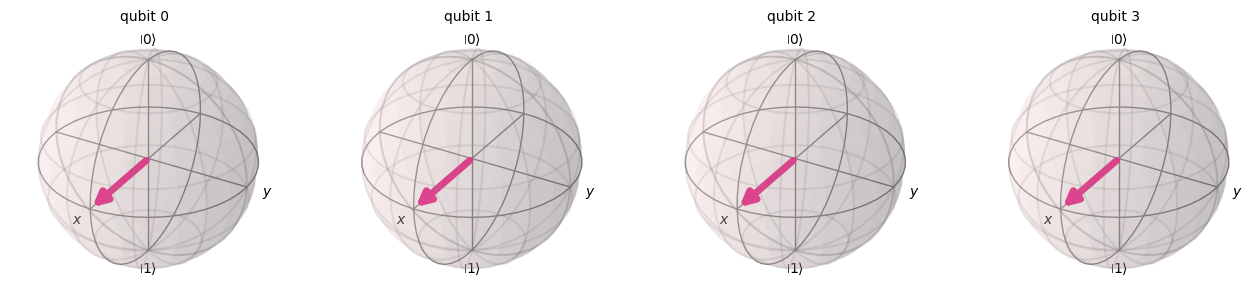

In [39]:
x=0
display(plot_bloch_multivector(states[x][0]))
display(plot_bloch_multivector(states[x][1]))

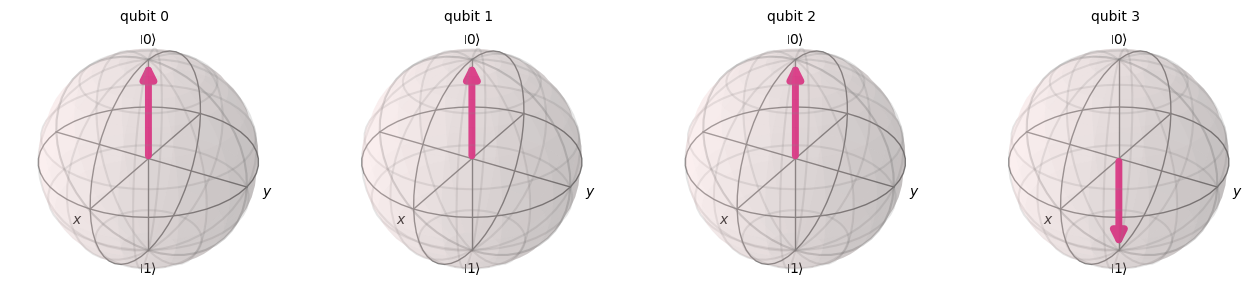

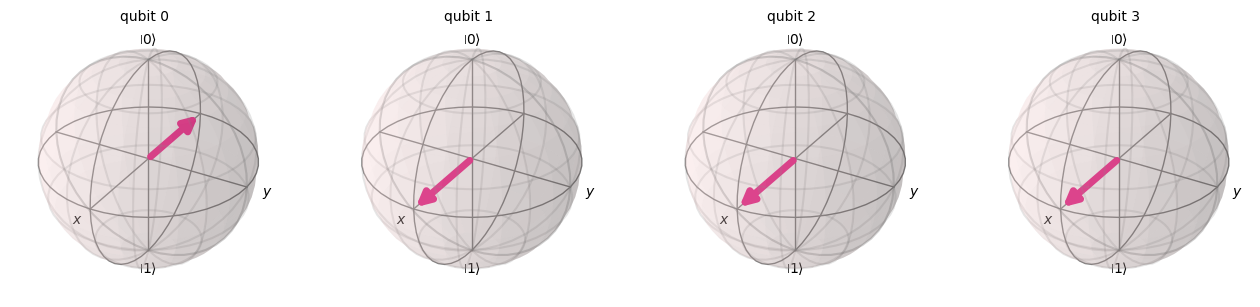

In [40]:
x=1
display(plot_bloch_multivector(states[x][0]))
display(plot_bloch_multivector(states[x][1]))

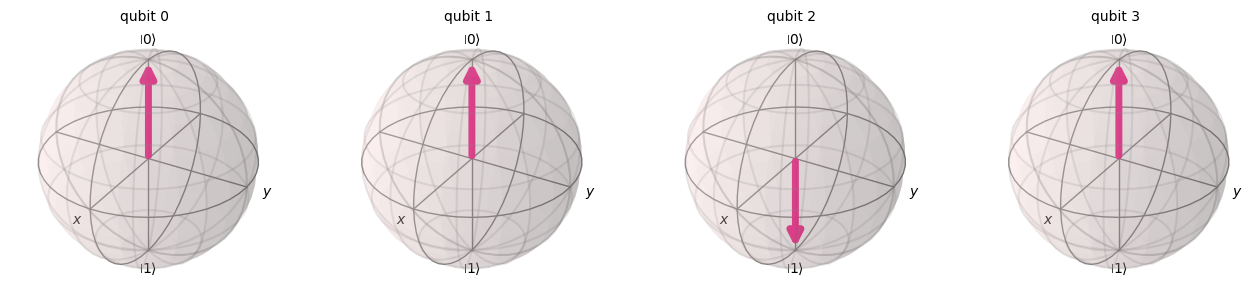

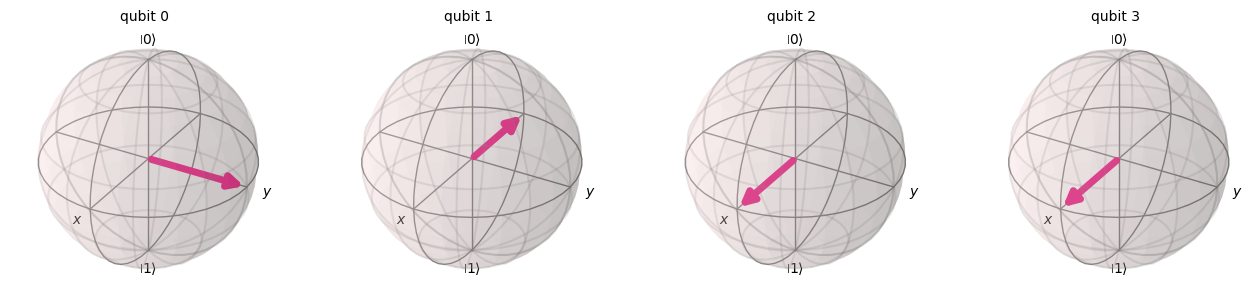

In [41]:
x=2
display(plot_bloch_multivector(states[x][0]))
display(plot_bloch_multivector(states[x][1]))

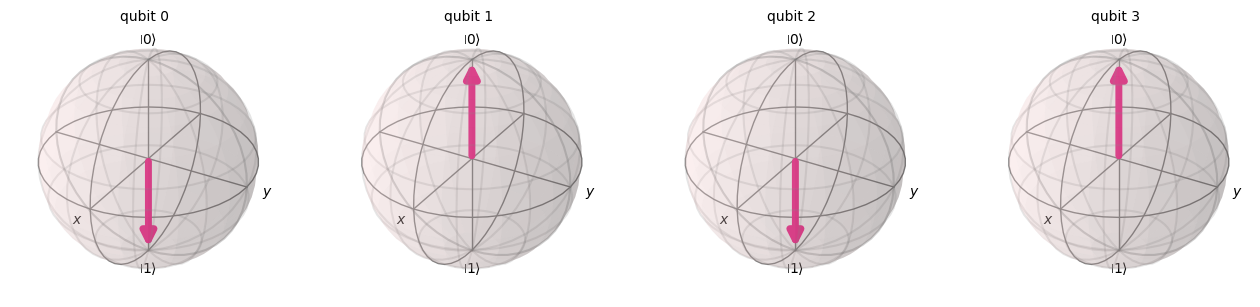

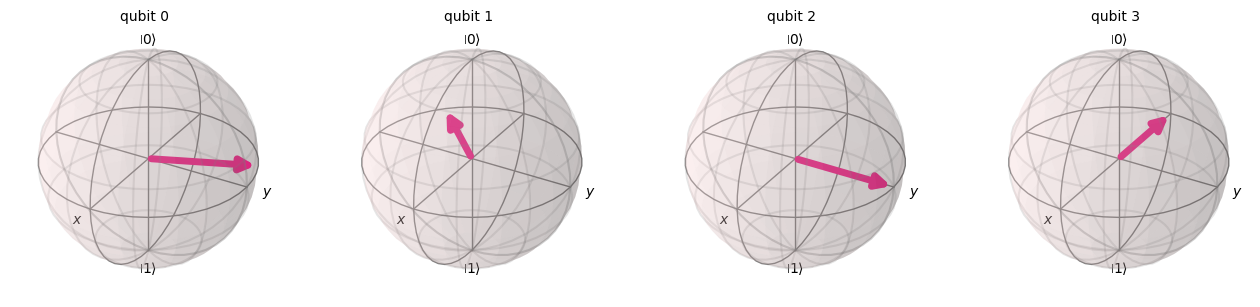

In [42]:
x=10
display(plot_bloch_multivector(states[x][0]))
display(plot_bloch_multivector(states[x][1]))

# Phase Estimation

Given an unitary operator $U$ with eigenstate $|\psi\rangle$ and eigenvalue $\exp i\theta$:

$$U|\psi\rangle=\exp( i\theta)|\psi\rangle$$

QPE, Quantum Phase Estimation, allows to estimate the phase $\theta$. Consider the following circuit, where the phase kickback trick is applied:

![QPE_1qb](QPE_1qubit.avif)

$$|\pi_2\rangle=|\psi\rangle\otimes\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{\exp{i\theta}}{\sqrt{2}}|1\rangle\right)$$
$$|\pi_3\rangle=|\psi\rangle\otimes\left(\frac{1+\exp{i\theta}}{\sqrt{2}}|0\rangle+\frac{1-\exp{i\theta}}{\sqrt{2}}|1\rangle\right)$$

The probability of measuring $0$ or $1$ is:

$$P_0(\theta)=\left| \frac{1+e^{i\theta}}{2} \right|^2=\cos^2\left( \frac{\theta}{2}\right)$$
$$P_1(\theta)=\left| \frac{1-e^{i\theta}}{2} \right|^2=\sin^2\left( \frac{\theta}{2}\right)$$
This "trick" is actually QPE using 1 qubit. 


- The phase can be found by repeating the experiment and obtaining statistic on the probabilities. 
- If we are promised that $\theta=0$ or $\theta=\pi$ a single measurement can be made and the information gained is binary. This means that the information gained is a bit $a$ after the fractional point of: $\theta/(2\pi)=0.a$  

The measurement outcome can be viewed as a guess for the bit $a$, smaller as $\theta$ is closer to $0$ or $\pi$.
To get more precision, i.e. more decimal points, more qubits must be used. In the i-th qubits, it is encoded the information about the i-th binary fractional digit. This can be achieved observing that:

$$U^{2^x}|\psi\rangle=e^{i\theta 2^x}|\psi \rangle$$

The information written in the first register after the series of controlled $U$ is exactly the  QFT, Quantum Fourier Transform (with phase $2\pi \theta/2^n$), therefore the inverse QFT can be applied as a final step in the circuit for QPE:

![QPE_circuit](QPE_circuit.png)

In [43]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

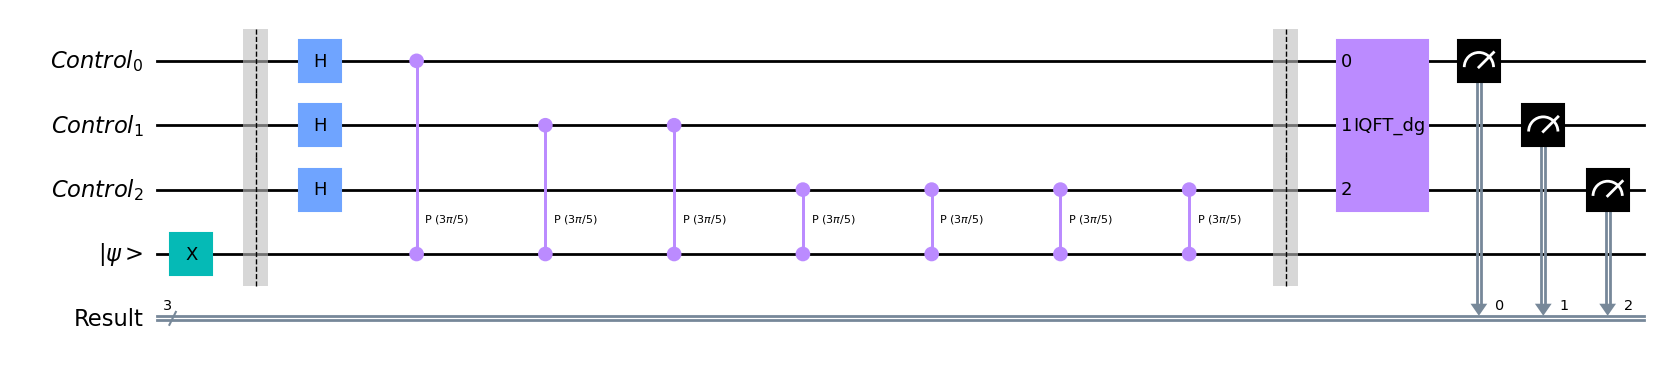

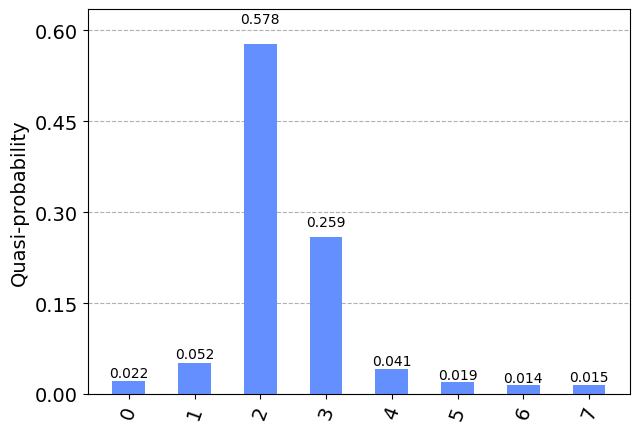

In [44]:
#qiskit code

theta = 0.3 # \theta \in [0,1]
m = 3 # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2*np.pi*theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw('mpl'))

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))


# Order finding problem

The order finding problem can be solved using QPE and there are no efficient classical algorithms to solve it. It is the only quantum subroutine in Shor's algorithm (used to factorize numbers). 
The problem takes as input 2 positive coprime integers $a$ and $N$ i.e. $gcd(a,N)=1$ and gives as output the smallest positive integer $r$ such that: $$a^r\equiv 1 \mod N$$
$r$ is called "order" of $a$ in $\mathbb{Z}_N=\{0,1,\cdots,N-1\}$. The set of elemelents coprime to $N$ is $\mathbb{Z}_N^*=\{a\in\mathbb{Z}_N : gcd(a,N)=1\}$.

To solve this problem, as a first step the oracle $M_a$, acting as a multiplication, must be defined:



$$M_a|x\rangle=|ax\rangle \qquad a\in \mathbb{Z}_N^* \quad ,\quad x\in \mathbb{Z}_N$$
$$M_a|x\rangle=|x\rangle \qquad , \qquad x\notin \mathbb{Z}_N$$

here the value $ax$ is computed $\mod N$. Since  $gcd(a,N)=1$, the operator $M_a$ is unitary, resulting in a one to one map from $\mathbb{Z}_N$ to itself: a permutation (therefore the oracle is a permutation matrix). 

Surely, since $M_a$ is a permutation, an eigenvector with eigenvalue equal to 1 is:

$$|\psi_j\rangle=\frac{|1\rangle+|a\rangle+\cdots+|a^{r-1}\rangle}{\sqrt{r}}$$

Indeed, multiplying by $a$, each standard basis state $|a^k\rangle$ is shifted to $|a^{k+1}\rangle$, until $|a^{r-1}\rangle$ goes back to $|1\rangle$.

Similarly, others eigenvalues of $M_a$ are related to the order of $a$:

$$|\psi_j\rangle=\frac{|1\rangle+\omega_r^{-j}|a\rangle+\cdots+\omega_r^{-j(r-1)}|a^{r-1}\rangle}{\sqrt{r}}=\frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}\omega_r^{-jk}|a^k\rangle \qquad w_r=\exp \left(\frac{2\pi i}{r}\right)$$
$$M_a|\psi_j\rangle=\omega_r^j|\psi_j \rangle= \exp \left( \frac{2\pi i \ j}{r}\right)|\psi_j \rangle  \qquad j\in\{0, \cdots,r-1\}$$

The fact that the eigenvalues are the root of unity $\omega_r^j$ can also be seen by $M_a^r=\mathbb{I}$.
There are also other eigenvectors, such as $|0\rangle$ with eigenvalue 1, but we'll only use the $|\psi_j\rangle$. 

Therefore the QPE circuit solve for the order finding problem, but is necessary to postprocess the results to find $j$ and $r$. The precision on QPE is also important, in particular we need to be able to discriminate $1/r$ (if j=1) from nearby possibilities, $1/(r-1)$ and $1/(r+1)$. The distance between the two numbers we need to discriminate is in the worst case: 

$$\frac{1}{r}-\frac{1}{r+1}=\frac{1}{r(r+1)}$$

The distance between the measured phase $y/2^m$ and $1/r$ must be less than the half of that distance, and taking the worst case where $r\to N$ we get:

$$\left| \frac{y}{2^m} - \frac{1}{r} \right| \leq \frac{1}{2N^2}$$

From this, the minimum precision required to ensure a high probability of success is:

$$m= 2 \log(N)+1$$

However, in general $j\neq 1$, so we need to use a trick to still extract the correct value of $r$.

The trick is to do a random sampling of those eigenvalues, use QPE to estimate the  phases $j/r$, and use the classical algorithm of continued fraction, to find $j$ and $r$. (This method is useful for finding rational approximations to a given floating-point number, slightly different from continued fraction algorithm).
https://docs.python.org/3/library/fractions.html#fractions.Fraction.limit_denominator
Since $j$ and $r$ could share some factors, taking the least common multiple of the various denominators recovered will result in $r$.
To get a sufficient precision, in the QPE must be used $m=2 \log(N)+1$ qubits.

We still don't know how to choose a good eigenvector. The solution is not to choose at all, but to do a random sampling of eigenstates. To select uniformly the eigenstates $|\psi_j\rangle$ is used the relation:


$$|1\rangle=\frac{|\psi_0\rangle+|\psi_1\rangle+ \cdots + |\psi_{r-1}\rangle}{\sqrt{r}}$$

This can be verified by:

$$\frac{1}{\sqrt{r}}\sum_{j=0}^{r-1}|\psi_j\rangle=\frac{1}{r}\sum_{j=0}^{r-1}\sum_{k=0}^{r-1}\omega_r^{-jk}|a^k\rangle=|1\rangle+\frac{1}{r}\sum_{k=1}^{r-1}\left(\sum_{j=0}^{r-1} \omega_r^{-jk}\right)|a^k\rangle=|1\rangle$$

where it was used the geometric series formula.

### Important Observation

The cost of implementing the controlled unitary operation $M_a$ in QPE would increase exponentially. However, it is possible to create a different $M_{b=a^k \mod N}$ for each iteration of QPE instead of using the powers of $M_a$. If this wasn't the case, the order finding problem wouldn't be solvable efficiently on a quantum computer! 

# Shor's Algorithm

This algorithm has a subroutine that can be implemented on a quantum computer gaining an exponential speed up.
Provided that $N$ is odd and not a prime power (there are efficient classical methods for those cases), the following algorithm give a factor of $N$ with probability at least $1/2$:

1. Choose $a\in \{2, \cdots, N-1\}$ at random;
2. Compute $d=gcd(a,N)$ using for example Euclid's algorithm. If $d\geq 2$ output $d$ and stop, since it is a factor of $N$. If $d=1$ then $a\in\mathbb{Z}_N^*$ and the order of $a$ is well defined;
3. *Quantum subroutine:* compute the order $r=\text{ord}(a)$ modulo $N$ by using QPE;
4. If $r$ is even, compute $d=\text{gcd}(a^{r/2}\pm 1,N)$ If $d\geq2$ output $d$ and stop, Else the algorithm has failed and need to be run again.


The last step works thanks to the following observation:
$$(a^{r/2}+1)(a^{r/2}-1)=a^r-1=0=N \mod N$$

In [45]:
# Here we'll implement Shor's algorithm in Qiskit to factor number 15. 
# The code is taken from https://learning.quantum-computing.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring#phase-estimation-procedure

from fractions import Fraction
from math import gcd


In [46]:
def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2,13]:
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
    if a in [7,8]:
        U.swap(0,1)
        U.swap(1,2)
        U.swap(2,3)
    if a in [4, 11]:
        U.swap(1,3)
        U.swap(0,2)
    if a in [7,11,13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

In [47]:
c_amod15(4)

Instruction(name='c4 mod 15', num_qubits=5, num_clbits=0, params=[])

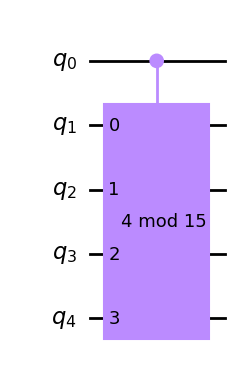

In [48]:
M_a = QuantumCircuit(5)
M_a=M_a.compose(c_amod15(4))
M_a.draw('mpl')

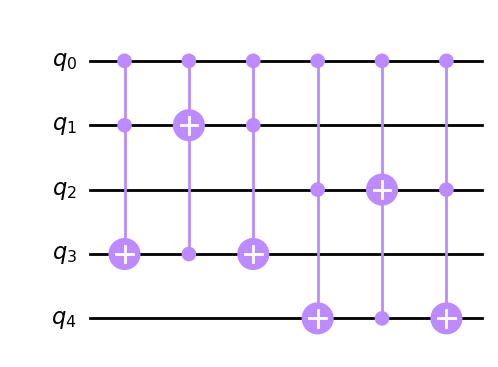

In [49]:
M_a.decompose().draw('mpl')

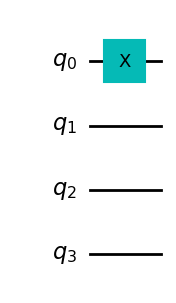

In [50]:
# prepare state |1>

psi_prep = QuantumCircuit(4)
psi_prep.x(0)
display(psi_prep.draw('mpl'))

In [51]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int,
        show_circ = False
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)
    
    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True
            )

    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)

    if show_circ:
        display(qc.draw('mpl'))
    
    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

In [52]:
phase_estimation(
        c_amod15(7),
        psi_prep,
        precision=8,
        show_circ=False
    )

0.5

In [53]:
a = 4
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")
    
    phase = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a**(r//2)-1, N)
        if guess not in [1,N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True


Attempt 1

Attempt 2

Attempt 3
Non-trivial factor found: 3


# Appendix

## Euclid's Algorithm

Find the gcd - Greatest Common Divisor of two numbers.

At every step $k$, the Euclidean algorithm computes a quotient $Q_{_k}$ and remainder $r_{_k}$ from two numbers $r_{_{k-1}}$ and $r_{_{k-2}}$:

$$r_{_{k-2}}=Q_{_k}r_{_{k-1}}+r_{_k}$$


where the $r_{_k}$ is non-negative and is strictly less than the absolute value of $r_{_{k-1}}$.
Since in the basic version the quotients are not needed, one may replace Euclidean division by the modulo operation, which gives only the remainder. Thus the iteration of the Euclidean algorithm becomes simply:

$$r_{_k}= r_{_{k-2}} \mod r_{_{k-1}}$$


## Continued Fraction Algorithm

(Nielsen and Chuang, pag 230 box 5.3)

The idea of the continued fractions algorithm is to describe real numbers in terms
of integers alone, using expressions of the form>

$$[a_0,a_1, \cdots, a_n]=a_0+\frac{1}{a_1+\frac{1}{\cdots \ +\ \frac{1}{a_n}}}$$
where $a_k$ are positive integers ($a_0$ can be 0). The $m$-th convergent ($0\leq m \leq n$) to this continued fraction to be $[a_0,a_1, \cdots, a_m]$. The continued fractions algorithm
is a method for determining the continued fraction expansion of an arbitrary real
number. It is easily understood by example. 

Suppose we are trying to decompose 31/13 as a continued fraction. . The first step of the continued fractions algorithm is to split 31/13 into its integer and fractional part using  Euclid's algorithm:

$$\frac{31}{13}=2+\frac{5}{13}$$
Next we invert the fractional part, obtaining

$$\frac{31}{13}=2+\frac{1}{\frac{13}{5}}$$
These steps – split then invert – are now applied to 13/5, giving:

$$\frac{31}{13}=2+\frac{1}{2+\frac{1}{\frac{3}{5}}}$$
It’s clear that the continued fractions algorithm terminates after a finite number of ‘split and invert’ steps for any rational number, since the numerators which appear (31, 5, 3, 2, 1 in the example) are strictly decreasing.